In [ ]:
pip install plotly


In [ ]:
pip install dash

In [ ]:
pip install pandas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [5]:
import pandas as pd

# Read the CSV files
commodity_O = pd.read_csv('commodity_trad.csv',sep = ',')


In [6]:
commodity_O.columns

Index(['Country', 'comm_code', 'commodity', 'flow', 'trade_usd', 'weight_kg',
       'quantity_name', 'quantity', 'category', 'Carbon Footprint'],
      dtype='object')

In [7]:
commodity_O = commodity_O.drop(columns=['Country', 'commodity','Carbon Footprint','category'])

In [8]:
commodity_O.columns


Index(['comm_code', 'flow', 'trade_usd', 'weight_kg', 'quantity_name',
       'quantity'],
      dtype='object')

In [9]:
commodity_O

,comm_code,flow,trade_usd,weight_kg,quantity_name,quantity
0,10410,Export,6088.000,2339.0,Number of items,51.00
1,10420,Export,3958.000,984.0,Number of items,53.00
2,10290,Import,2414533.000,1114023.0,Number of items,6853.00
3,10392,Import,7648728.875,4270997.0,Number of items,96040.00
4,10511,Import,2671732.000,254652.0,Number of items,4895775.75
...,...,...,...,...,...,...
37403,121220,Export,1014203.000,1687717.0,Weight in kilograms,1687717.00
37404,121299,Import,4137.000,1369.0,Weight in kilograms,1369.00
37405,121300,Export,11.000,4.0,Weight in kilograms,4.00
37406,121410,Import,1720.000,2000.0,Weight in kilograms,2000.00


In [10]:
commodity=commodity_O

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
commodity['flow'] = encoder.fit_transform(commodity['flow'])
commodity['quantity_name'] = encoder.fit_transform(commodity['quantity_name'])
#merged_df['Region'] = encoder.fit_transform(merged_df['Region'])
#merged_df['Data Quality'] = encoder.fit_transform(merged_df['Data Quality'])

In [12]:
# Séparer les features et la variable cible
X = commodity[['flow', 'comm_code','quantity_name', 'quantity']]
y = commodity['trade_usd']

In [13]:
X.columns

Index(['flow', 'comm_code', 'quantity_name', 'quantity'], dtype='object')

In [14]:
commodity.dtypes

comm_code          int64
flow               int32
trade_usd        float64
weight_kg        float64
quantity_name      int32
quantity         float64
dtype: object

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression linéaire
lin = LinearRegression()

# Adapter le modèle aux données d'entraînement
lin.fit(X_train, y_train)

# Prédire les valeurs de la variable cible pour les données de test
y_pred_lin = lin.predict(X_test)

# Calculer le score R² pour les prévisions
score = r2_score(y_test, y_pred_lin)

# Afficher le score R²
print("R² score:", score)



R² score: 0.6730698764068783


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression par arbre de décision
reg_tree = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'entraînement
reg_tree.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_tree = reg_tree.predict(X_test)

# Calculer les métriques d'évaluation
r2 = r2_score(y_test, y_pred_tree)


In [17]:

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=4)

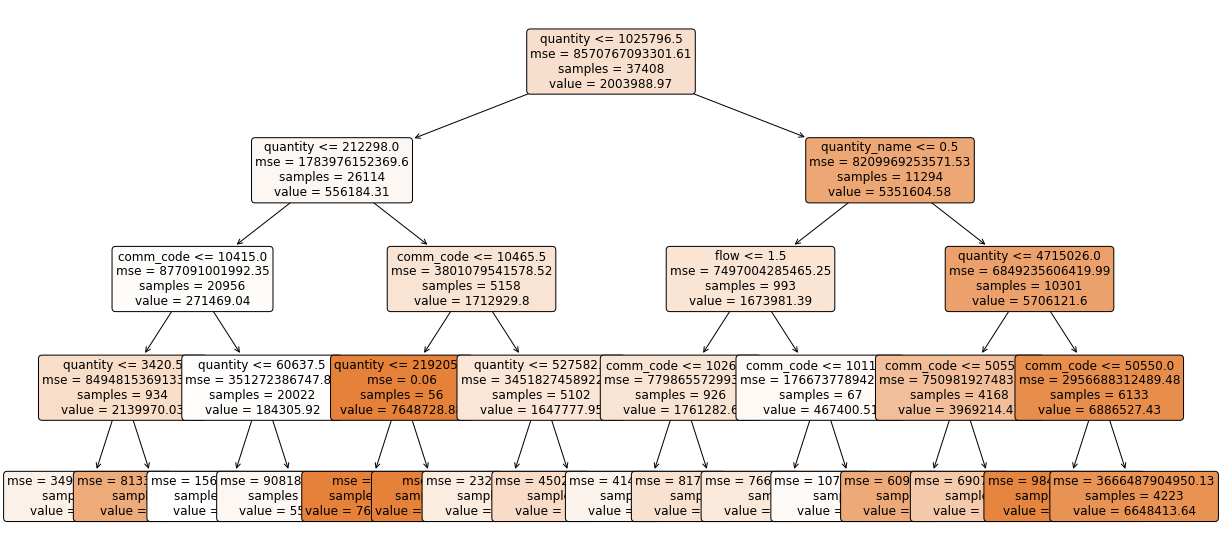

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, 
          fontsize=12, label='all', impurity=True, precision=2)
plt.show()

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de forêt aléatoire avec 100 arbres
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Former le modèle sur les données d'entraînement
model_rf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_rf = model_rf.predict(X_test)

# Calculer le score R² pour les prévisions
score = r2_score(y_test, y_pred_rf)

# Afficher le score R²
print("R² score:", score)



R² score: 0.8314541670235569


In [20]:
# Calculer les mesures de performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Calculer les mesures de performance
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lr = mean_absolute_error(y_test, y_pred_lin)
r2_lr = r2_score(y_test, y_pred_lin)
# Calculer les mesures de performance
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
# Afficher les résultats
# Afficher les résultats
print("reg_tree(MSE):", rmse_tree)
print("reg_tree (MAE):", mae_tree)
print("reg_tree (R2):", r2_tree)
print("---------------------------")
print("Random Forest Regressor - RMSE:", rmse_rf)
print("Random Forest Regressor - MAE:", mae_rf)
print("Random Forest Regressor - R²:", r2_rf)
print("---------------------------")
print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - R²:", r2_lr)


reg_tree(MSE): 1414363.480194311
reg_tree (MAE): 649492.7194467593
reg_tree (R2): 0.7641106166877881
---------------------------
Random Forest Regressor - RMSE: 1195544.776821341
Random Forest Regressor - MAE: 571909.4811894526
Random Forest Regressor - R²: 0.8314541670235569
---------------------------
Linear Regression - RMSE: 1665076.9386414469
Linear Regression - MAE: 1059056.8560716023
Linear Regression - R²: 0.6730698764068783


Interpretation:

The Random Forest Regressor performs the best among the three models, having the lowest RMSE and MAE and the highest R-squared score. It indicates that the Random Forest model provides the most accurate predictions compared to the other models.
The Regression Tree model also shows good performance with an acceptable R-squared score. However, it has higher errors (RMSE and MAE) compared to the Random Forest model.
The Linear Regression model performs the worst among the three models, having the highest RMSE and MAE and the lowest R-squared score. This suggests that the linear relationship between the features and the target variable might not be sufficient to capture the underlying patterns in the data.
In conclusion, based on the evaluation metrics, the Random Forest Regressor appears to be the most effective model for predicting the target variable in your data.

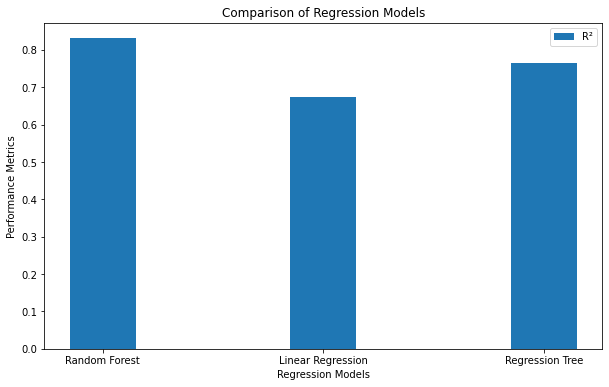

In [21]:

# Create a bar plot of the performance metrics
models = ['Random Forest', 'Linear Regression', 'Regression Tree']
rmse_scores = [rmse_rf, rmse_lr, rmse_tree]
mae_scores = [mae_rf, mae_lr, mae_tree]
r2_scores = [r2_rf, r2_lr, r2_tree]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, width=0.3, label='R²')


plt.xlabel('Regression Models')
plt.ylabel('Performance Metrics')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

In [24]:
import pickle

# Save the trained model to a file
filename = 'trained_model_trad.pkl'
with open(filename, 'wb') as file:
    pickle.dump(reg_tree, file)


In [25]:
# Supposons que vous avez une nouvelle observation représentée par les features suivants :
new_observation = [[0,10410,1,51.00]]

# Faire une prédiction avec le modèle entraîné
predicted_carbon_footprint = reg_tree.predict(new_observation)

# Afficher la prédiction
print("La prédiction du modèle pour la nouvelle observation est:", predicted_carbon_footprint)

La prédiction du modèle pour la nouvelle observation est: [6088.]
